In [ ]:
import warnings
#!pip install wittgenstein
#!pip3 install mlxtend
warnings.filterwarnings('ignore')

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import wittgenstein as lw
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import os

In [2]:
file_path = os.path.abspath("Balanced_Bankruptcy.csv")
df_prime = pd.read_csv(file_path)

df = df_prime
df = df.drop("Bankrupt?", axis='columns')

#only c values
target = df_prime["Bankrupt?"].to_numpy()
#data without the c
data  = df.to_numpy()

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def get_confussion_matrix(mean_of_model,x):
    disp = ConfusionMatrixDisplay(confusion_matrix=mean_of_model)
    disp.plot(cmap='Oranges',values_format='.3g')
    plt.title(f' model: {x}')
    plt.show()
    return

def get_score(modelo, data, target):
    kf = KFold(n_splits=5)
    
    conf_matrix_list_of_arrays = []
    scores = []

    for train_index, test_index in kf.split(data,target):
        trainX, testX = data[train_index], data[test_index]
        trainY, testY = target[train_index], target[test_index]
        model = modelo
        model.fit(trainX, trainY) #confussion Matrix storage for error metrics
        conf_matrix = confusion_matrix(testY, model.predict(testX))
        conf_matrix_list_of_arrays.append(conf_matrix)
        
        scores.append(model.score(testX, testY)) #scores storgae for accuracy value
        
    mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
    
    print(f" Accuracy for {modelo} is = {np.average(scores)}")
    return mean_of_conf_matrix_arrays



#  ANALYSIS 1 ALL VARIABLES

 Accuracy for KNeighborsClassifier() is = 0.8606072553418077


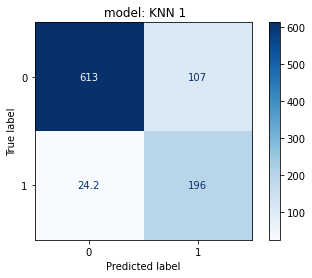

In [37]:
KNN1 = get_score(KNeighborsClassifier(n_neighbors=5),data, target)

get_confussion_matrix(KNN1,x = "KNN 1")

 Accuracy for <RIPPER(max_rules=None, alpha=1.0, max_total_conds=None, k=2, dl_allowance=64, verbosity=0, prune_size=0.33, max_rule_conds=None, random_state=None, n_discretize_bins=10)> is = 0.9491416853601613


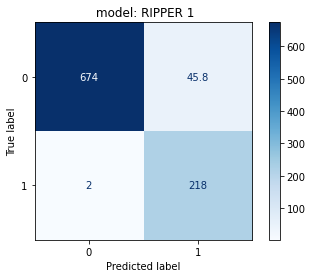

In [38]:
RIPPER_matrix = get_score(lw.RIPPER(),data, target)
get_confussion_matrix(RIPPER_matrix, x = "RIPPER 1")

 Accuracy for SVC(gamma='auto') is = 0.9989361702127659


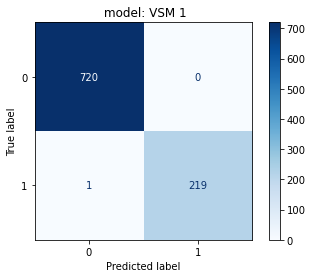

In [39]:
SVM_matrix = get_score(SVC(gamma='auto'),data, target)
get_confussion_matrix(SVM_matrix, x = "VSM 1")

 Accuracy for DecisionTreeClassifier() is = 0.9648859130355969


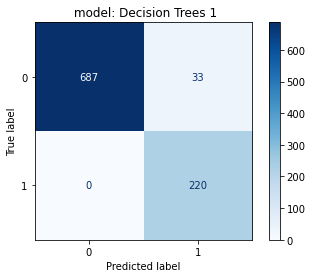

In [41]:
RD_matrix = get_score(DecisionTreeClassifier(),data, target)
get_confussion_matrix(RD_matrix, x = "Decision Trees 1")

C:\Users\Paul Andree\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Paul Andree\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Paul Andree\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


 Accuracy for MLPClassifier(activation='tanh', alpha=0.5, solver='sgd') is = 0.7697335327306098


C:\Users\Paul Andree\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


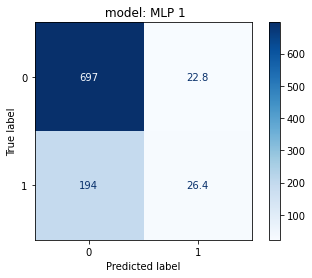

In [40]:
MLP = get_score(MLPClassifier(activation='tanh', solver='sgd', alpha=0.5),data, target)
get_confussion_matrix(MLP, x = "MLP 1")

# FEATURE SELECTION

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns

#Algorithm library
X_new = SelectKBest(f_classif, k=11)
kBest = X_new.fit_transform(data, target)


scores = pd.DataFrame(list(zip(list(df.columns), X_new.scores_)), columns=['Feature', 'Score'])


print('number of original features:', data.shape[1])
print('number of reduced features:', kBest.shape[1])

number of original features: 93
number of reduced features: 11


In [21]:

imp = scores.sort_values(by='Score',ascending=False)
imp

,feature,score
84,Net Income to Total Assets,1785.166408
36,Debt ratio %,1741.556216
37,Net worth/Assets,1741.556216
2,ROA(B) before interest and depreciation after...,1727.279821
1,ROA(A) before interest and % after tax,1692.229677
...,...,...
74,Cash Flow to Sales,0.220047
62,Inventory/Current Liability,0.039140
66,Long-term Liability to Current Assets,0.021998
47,Inventory Turnover Rate (times),0.016008


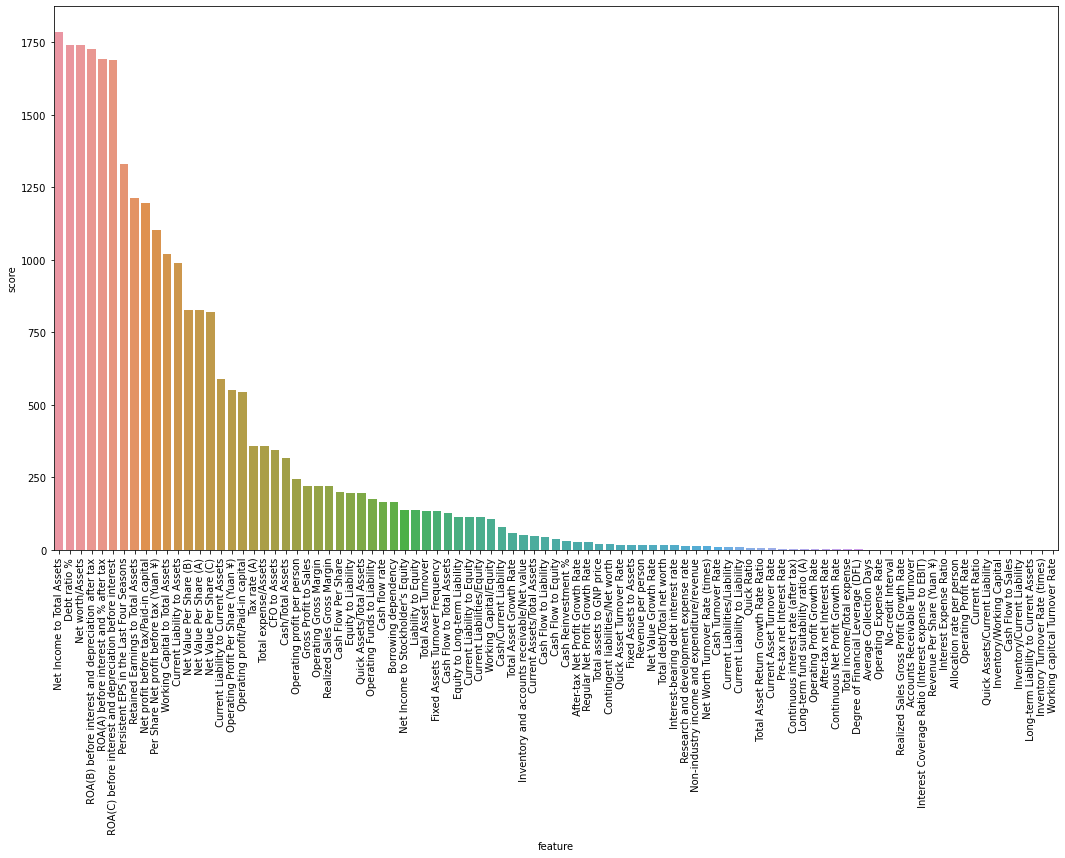

In [24]:
import seaborn as sns

plt.figure(figsize=(18,10))
sns.barplot(y='Score',x='Feature',data=imp)
plt.xticks(rotation=90)
plt.show()

In [69]:
features_chosen = np.asarray(df.columns)[X_new.get_support()]
print(features_chosen)
#print(scores)

[' ROA(C) before interest and depreciation before interest'
 ' ROA(A) before interest and % after tax'
 ' ROA(B) before interest and depreciation after tax'
 ' Persistent EPS in the Last Four Seasons'
 ' Per Share Net profit before tax (Yuan ¥)' ' Debt ratio %'
 ' Net worth/Assets' ' Net profit before tax/Paid-in capital'
 ' Working Capital to Total Assets' ' Retained Earnings to Total Assets'
 ' Net Income to Total Assets']


In [70]:
FSS_Univariate = df[features_chosen]

X= FSS_Univariate.to_numpy()
y = target

 Accuracy for KNeighborsClassifier(n_neighbors=8) is = 0.8948727709423787


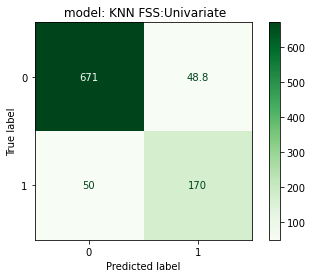

In [77]:
knn_matrix2 = get_score(KNeighborsClassifier(n_neighbors=8), X, y)
get_confussion_matrix(knn_matrix2, x = "KNN FSS:Univariate")

 Accuracy for <RIPPER(max_rules=None, alpha=1.0, max_total_conds=None, k=2, dl_allowance=64, verbosity=0, prune_size=0.33, max_rule_conds=None, random_state=None, n_discretize_bins=10)> is = 0.9033829560646229


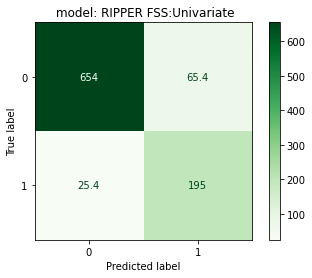

In [78]:
RIPPER_matrix2 = get_score(lw.RIPPER(), X, y)
get_confussion_matrix(RIPPER_matrix2, x = "RIPPER FSS:Univariate")

 Accuracy for SVC(gamma='auto') is = 0.853585752158249


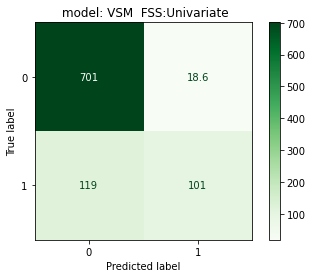

In [79]:
SVM_matrix2 = get_score(SVC(gamma='auto'), X, y)
get_confussion_matrix(SVM_matrix2, x = "VSM  FSS:Univariate")

 Accuracy for DecisionTreeClassifier() is = 0.9627593864001993


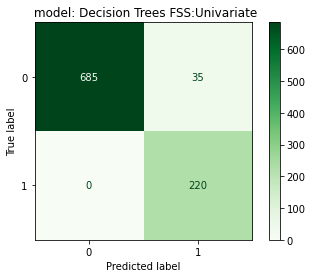

In [80]:
RD_matrix2 = get_score(DecisionTreeClassifier(), X, y)
get_confussion_matrix(RD_matrix2, x = "Decision Trees FSS:Univariate")


C:\Users\Paul Andree\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Paul Andree\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Paul Andree\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Paul Andree\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


 Accuracy for MLPClassifier(activation='tanh', alpha=0.5, solver='sgd') is = 0.7901667686311831


C:\Users\Paul Andree\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


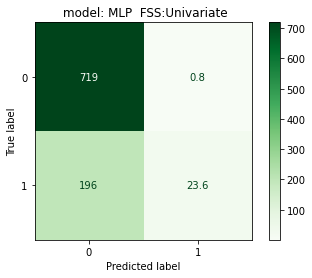

In [81]:
MLP2 = get_score(MLPClassifier(activation='tanh', solver='sgd', alpha=0.5), X, y)
get_confussion_matrix(MLP2, x = "MLP  FSS:Univariate")

# Multivariate

In [82]:
from skrebate import ReliefF

# Sample a smaller random subset of data
subset_size = 1000  # Adjust this to an appropriate size
X = df
y = df_prime["Bankrupt?"]
subset_indices = np.random.choice(len(X), subset_size, replace=False)
X_subset = X.iloc[subset_indices]
y_subset = y.iloc[subset_indices]

X_array = X_subset.values.astype(np.float32)
y_array = y_subset.values.ravel().astype(np.int32)

selector = ReliefF(n_features_to_select=11)  # Create a ReliefF feature selector
selector.fit(X_array, y_array) # Fit the selector to your data
selected_feature_indices = np.argsort(selector.feature_importances_)[::-1][:11]  # Get the indices of the selected features
selected_features = X_subset.columns[selected_feature_indices]

print(selected_features)
#X_multi = X_subset.loc[:, selected_features] # Use loc to select columns by name from X_subset
#print(X_multi)

Index([' Current Liability to Assets', ' Fixed Assets Turnover Frequency',
       ' Working Capital to Total Assets', ' Debt ratio %',
       ' Net worth/Assets', ' Operating Expense Rate',
       ' Quick Asset Turnover Rate', ' Quick Assets/Total Assets',
       ' Current Assets/Total Assets', ' Fixed Assets to Assets',
       ' Current Asset Turnover Rate'],
      dtype='object')


In [83]:
FSS_Multivariate = df[selected_features]

X= FSS_Multivariate.to_numpy()
y = target

 Accuracy for KNeighborsClassifier(n_neighbors=8) is = 0.7746355335010083


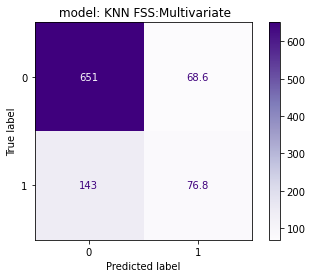

In [87]:
knn_matrix3 = get_score(KNeighborsClassifier(n_neighbors=8), X, y)
get_confussion_matrix(knn_matrix3, x = "KNN FSS:Multivariate")



 Accuracy for <RIPPER(max_rules=None, alpha=1.0, max_total_conds=None, k=2, dl_allowance=64, verbosity=0, prune_size=0.33, max_rule_conds=None, random_state=None, n_discretize_bins=10)> is = 0.8965767113044659


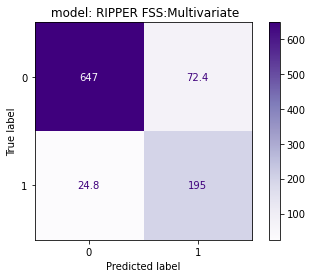

In [88]:
RIPPER_matrix3 = get_score(lw.RIPPER(), X, y)
get_confussion_matrix(RIPPER_matrix3, x = "RIPPER FSS:Multivariate")

 Accuracy for SVC(gamma='auto') is = 0.9084920580971156


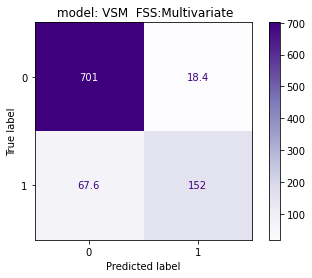

In [89]:
SVM_matrix3 = get_score(SVC(gamma='auto'), X, y)
get_confussion_matrix(SVM_matrix3, x = "VSM  FSS:Multivariate")

 Accuracy for DecisionTreeClassifier() is = 0.9570128928466227


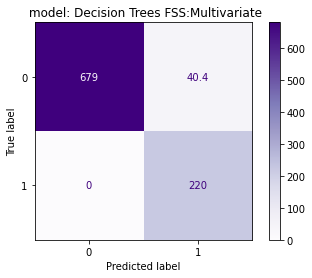

In [90]:
RD_matrix3 = get_score(DecisionTreeClassifier(), X, y)
get_confussion_matrix(RD_matrix3, x = "Decision Trees FSS:Multivariate")

C:\Users\Paul Andree\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Paul Andree\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Paul Andree\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Paul Andree\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


 Accuracy for MLPClassifier(activation='tanh', alpha=0.5, solver='sgd') is = 0.7761253483787642


C:\Users\Paul Andree\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


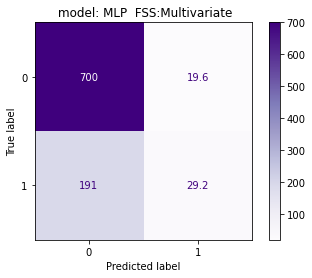

In [91]:
MLP3 = get_score(MLPClassifier(activation='tanh', solver='sgd', alpha=0.5), X, y)
get_confussion_matrix(MLP3, x = "MLP  FSS:Multivariate")

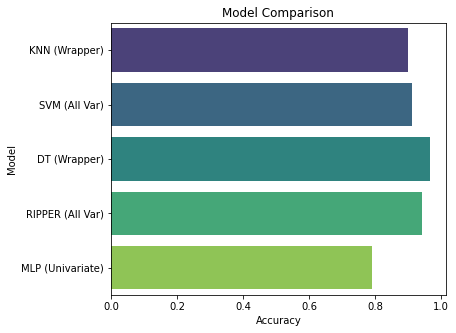

In [8]:
results = {'KNN (Wrapper)': 0.90,'SVM (All Var)': 0.91,'DT (Wrapper)': 0.965,'RIPPER (All Var)': 0.94,'MLP (Univariate)': 0.79}
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
plt.figure(figsize=(6,5))
sns.barplot(y='Model', x='Accuracy', data=results_df, palette='viridis')
plt.title('Model Comparison')
plt.show()